In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys

sys.path.append("../src")

import importlib

import get_mks_5000_ML_dataset

importlib.reload(get_mks_5000_ML_dataset)

<module 'get_mks_5000_ML_dataset' from '/home/jupyter/work/resources/diplom/notebooks/../src/get_mks_5000_ML_dataset.py'>

In [26]:
temp_columns_ = ["[101:1]", "[101:4]", "[101:5]", "[104_28]", "[101:20]", "[101:25]"]
df = get_mks_5000_ML_dataset.get_mks_5000_ML_dataset(
    data_from_="2022-06-30",
    data_to_="2022-07-02",
    data_columns_=temp_columns_,
    s3_data_prefix="data/PRE_GSND_",
)
df.rename(
    columns={
        "[101:1]": "Давление в системе",
        "[101:4]": "Уровень масла в баке",
        "[101:5]": "Температура масла в баке",
        "[104_28]": "Нагреватели включены",
        "[101:20]": "Количество работающих насосов",
        "[101:25]": "Количество работающих циркулляционных насосов",
        "[16:0]": "Режим прокат",
        "[16_11]": "Металл в клети",
        "stand_not_working_flg": "Клеть не в работе",
        "outage_flg": "Аномалия",
        "train_data_flg": "Обучающая выборка",
    },
    inplace=True,
)

  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
df.drop(columns=["[17_36]"], inplace=True)

In [5]:
df.head()

,Количество работающих насосов,Давление в системе,Уровень масла в баке,Металл в клети,Режим прокат,Температура масла в баке,Количество работающих циркулляционных насосов,Нагреватели включены,Клеть не в работе,Аномалия,Обучающая выборка
Time,,,,,,,,,,,
2022-06-30 00:00:00.000,9.0,212.962967,79.152199,0.0,212.0,43.125000,2.0,0.0,False,False,True
2022-06-30 00:00:00.100,9.0,212.962967,79.152199,0.0,212.0,43.125000,2.0,0.0,False,False,True
2022-06-30 00:00:00.200,9.0,206.365753,79.152199,0.0,212.0,43.098953,2.0,0.0,False,False,True
2022-06-30 00:00:00.300,9.0,206.365753,79.152199,0.0,212.0,43.098953,2.0,0.0,False,False,True
2022-06-30 00:00:00.400,9.0,206.365753,79.152199,0.0,212.0,43.098953,2.0,0.0,False,False,True


Визуализация металла в клети

In [44]:
df_ = df.loc[pd.Timestamp('2022-06-30 04:00:02.700'):pd.Timestamp('2022-06-30 12:00:02.700')]
stand_loaded = df_[df_['Металл в клети'] > 0]
stand_loaded.index = pd.to_datetime(stand_loaded.index)

In [37]:
stand_loaded.head()

,Количество работающих насосов,Давление в системе,Уровень масла в баке,Металл в клети,[17_36],Режим прокат,Температура масла в баке,Количество работающих циркулляционных насосов,Нагреватели включены,Клеть не в работе,Аномалия,Обучающая выборка
Time,,,,,,,,,,,,
2022-06-30 04:09:48.600,9.0,206.192139,78.370949,0.4,1.0,212.389984,44.427086,2.0,0.0,False,False,True
2022-06-30 04:09:48.700,9.0,205.671295,78.370949,1.0,1.0,215.000000,44.427086,2.0,0.0,False,False,True
2022-06-30 04:09:48.800,9.0,205.671295,78.370949,1.0,1.0,215.000000,44.427086,2.0,0.0,False,False,True
2022-06-30 04:09:48.900,9.0,205.671295,78.370949,1.0,1.0,215.000000,44.427086,2.0,0.0,False,False,True
2022-06-30 04:09:49.000,9.0,205.607620,78.370949,1.0,1.0,215.000000,44.427086,2.0,0.0,False,False,True


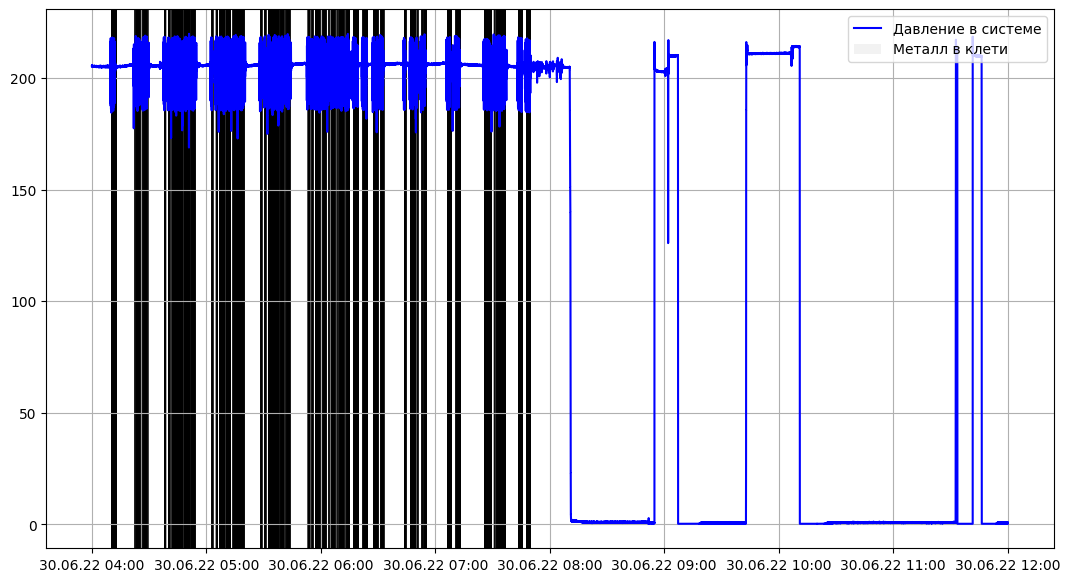

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 1 * 7))
myFmt = mdates.DateFormatter("%d.%m.%y %H:%M")
ax = axes
(line3,) = ax.plot(df_["Давление в системе"], color="b", label="Давление в системе")
for index, row in stand_loaded.iterrows():
    line5 = ax.axvspan(
        index,
        index + pd.Timedelta(minutes=1),
        alpha=0.05,
        color="k",
        label="Металл в клети",
        lw=0,
    )
ax.xaxis.set_major_formatter(myFmt)
ax.legend(handles=[line3, line5], loc="upper right")
ax.grid()

Визуализация температуры, уровня и давления одновременно

In [41]:
df_ = df.loc[pd.Timestamp('2022-07-20 21:00:53.200'):pd.Timestamp('2022-07-21 00:00:53.200')]
stand_loaded = df_[df_['Металл в клети'] > 0]
stand_loaded.index = pd.to_datetime(stand_loaded.index)

In [42]:
stand_loaded.head()

,Количество работающих насосов,Давление в системе,Уровень масла в баке,Металл в клети,[17_36],Режим прокат,Температура масла в баке,Количество работающих циркулляционных насосов,Нагреватели включены,Клеть не в работе,Аномалия,Обучающая выборка
Time,,,,,,,,,,,,


2022-07-20 21:00:53.200000 2022-07-21 00:00:53.200000


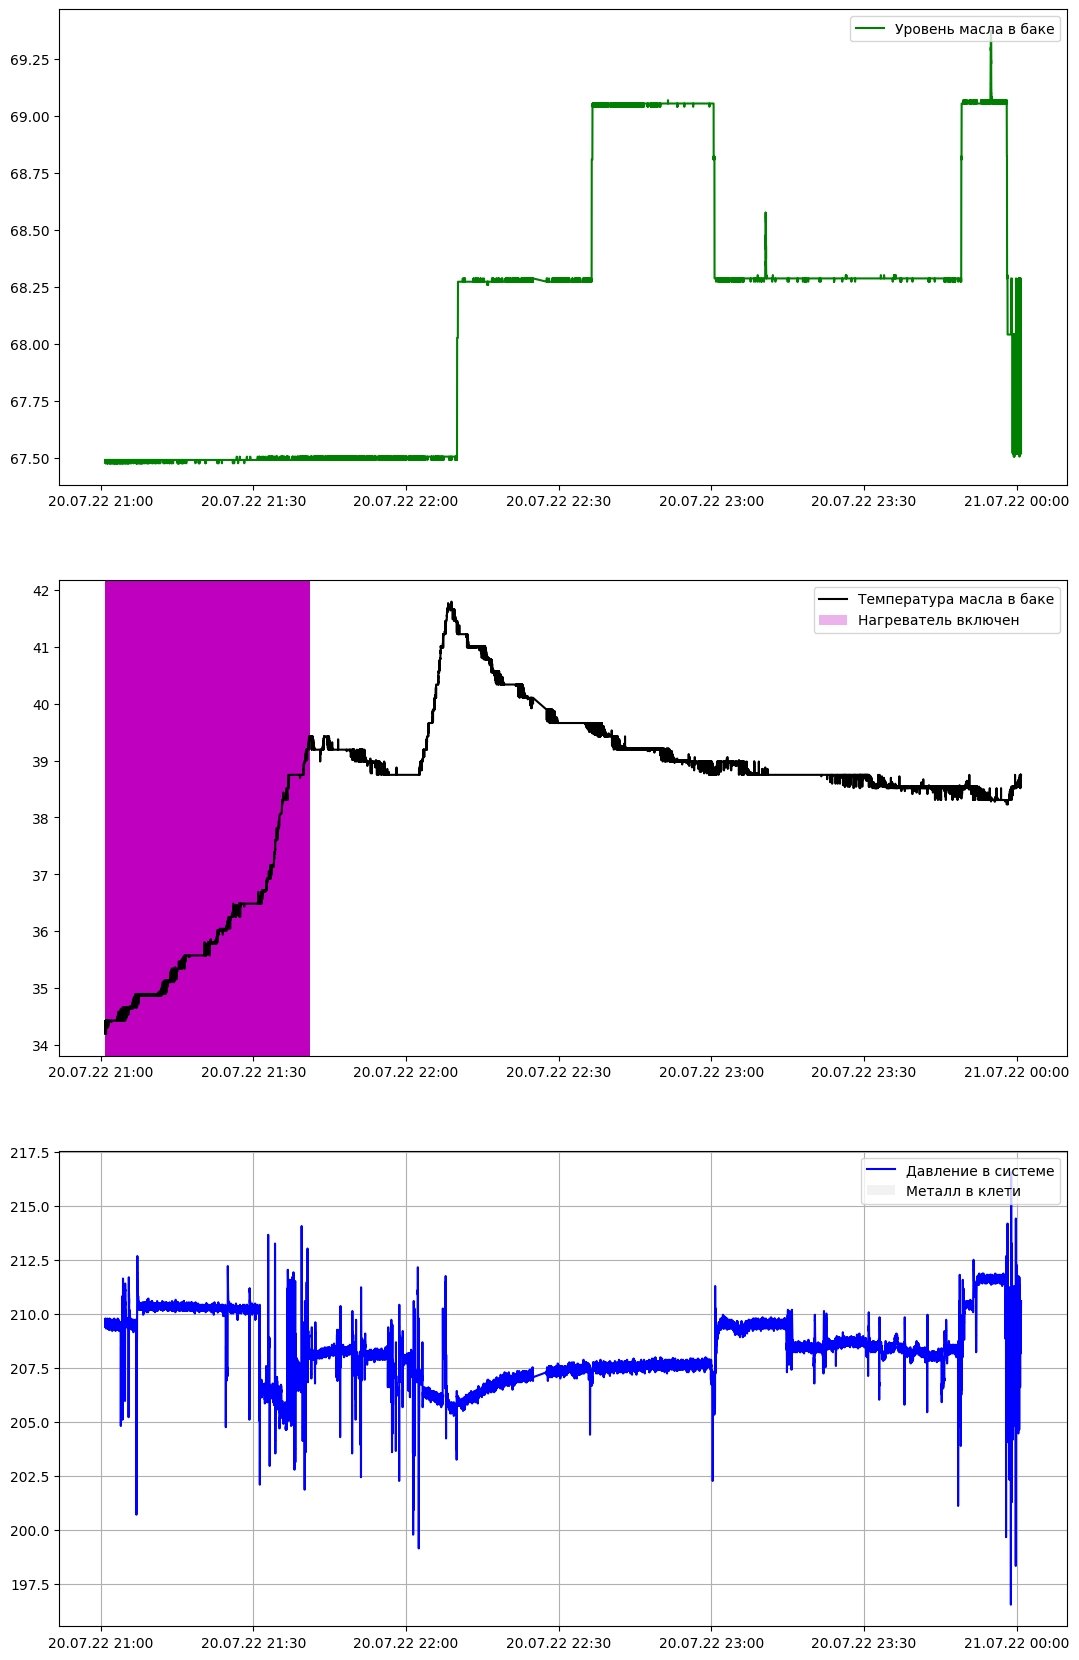

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 3 * 7))
myFmt = mdates.DateFormatter("%d.%m.%y %H:%M")
ax = axes[0]
(line1,) = ax.plot(df_["Уровень масла в баке"], color="g", label="Уровень масла в баке")
ax.xaxis.set_major_formatter(myFmt)
ax.legend(handles=[line1], loc="upper right")
ax = axes[1]
(line2,) = ax.plot(
    df_["Температура масла в баке"], color="k", label="Температура масла в баке"
)
ax.xaxis.set_major_formatter(myFmt)
heater_df = df_["Нагреватели включены"].apply(lambda x: 1 if x > 0.7 else 0)
heater_index = heater_df[heater_df == 1].index
if len(heater_index) > 0:
    print(
        pd.to_datetime(line1.get_data()[0][0]), pd.to_datetime(line1.get_data()[0][-1])
    )
for index in heater_index:
    line1_1 = ax.axvspan(
        index,
        index + pd.Timedelta(minutes=1),
        alpha=0.3,
        color="m",
        label="Нагреватель включен",
        lw=0,
    )

ax.legend(handles=[line2, line1_1], loc="upper right")
ax = axes[2]
(line3,) = ax.plot(df_["Давление в системе"], color="b", label="Давление в системе")
for index, row in stand_loaded.iterrows():
    line5 = ax.axvspan(
        index,
        index + pd.Timedelta(minutes=1),
        alpha=0.05,
        color="k",
        label="Металл в клети",
        lw=0,
    )
ax.xaxis.set_major_formatter(myFmt)
ax.legend(handles=[line3, line5], loc="upper right")
ax.grid()